In [2]:
# displays your plots without you having to explicitly call show
%matplotlib inline    
# have your lab4 code auto reload when you re-run
%load_ext autoreload
%autoreload 2

In [3]:
import ggplot as gg   # in vagrant VM, do "pip install ggplot" to install ggplot
import pandas as pd

In [4]:
countries = pd.read_csv("cia.csv")
countries = countries.dropna()  # get rid of rows that have missing data
countries.head()

,index,country,pop,area,oil_prod,gdp,educ,roadways,net_users
1,2,Albania,3029278,28748.0,20510.0,11900.0,3.3,0.626131,>35%
2,3,Algeria,39542166,2381741.0,1420000.0,14500.0,4.3,0.047719,>15%
5,6,Angola,19625353,1246700.0,1742000.0,7300.0,3.5,0.041252,>15%
7,8,Antigua and Barbuda,92436,443.0,0.0,23600.0,2.4,2.641084,>60%
8,9,Argentina,43431886,2780400.0,532100.0,22600.0,6.3,0.083216,>35%


## Aesthetics

Let's map the $x$ and $y$ coordinates to attributes `educ` and `gdp` respectively.

To draw points, we use the `geom_point` function.  The `geom_point` function draws points at given $x$, $y$ coordinates.  It will use the *aesthetic mapping* to determine where to draw the points.

Note: size of point is *not* an aesthetic in this example because its values is fixed and not mapped from the data.

In [ ]:
g = gg.ggplot(countries, gg.aes(x="educ", y="gdp")) 
g + gg.geom_point(size=40)   

## Marks

Let's use a different kind of mark.  The `geom_text` requires specifying the label aesthetic.

In [ ]:
g = gg.ggplot(countries, gg.aes(x="educ", y="gdp", label="country")) 
g + gg.geom_text()

## Layers

A graphic is composed of layers.  This lets you combine different visualization components together.

Example: we can put two different kinds of glyphs on the same plot.

Software implementation: the `+` symbol is overridden allowing new layers are "added" to `g`.  In python, the `+` actually calls a method defined on the layer object.

In [ ]:
g = gg.ggplot(countries, gg.aes(x="educ", y="gdp", label="country")) 
g + gg.geom_point() \
+ gg.geom_text(hjust=0.15, vjust=1000, color="red")  # note: text offsets hjust and vjust are based on scale of data

## More aesthetics

Back to points.  Let's add more aesthetics: color and size.

Note: size of point *is* an aesthetic in this example because its value is mapped from the data.

In [ ]:
g = gg.ggplot(countries, gg.aes(x="educ", y="gdp", color="net_users", size="roadways")) 
g + gg.geom_point()

## Scales

Scales determine the mapping from data to aesthetic property.

Let's adjust the color scale, taking a qualitative color scale from [ColorBrewer](http://colorbrewer2.org/).

Let's also adjust the $y$ aesthetic so it's on a log scale.  This allows us to see more fine-grained detail for countries with low GDP.

In [ ]:
g = gg.ggplot(countries, gg.aes(x="educ", y="gdp", color="net_users")) 
g + gg.geom_point() \
+ gg.scale_color_brewer(type="qual") \
+ gg.scale_y_log() 

## Faceting

Faceting is related to the small multiple idea discussed last time.  

Here we plot the same data as above but separated into five separate plots based on the `net_users` attribute.

Behind the scales: the scale is computed on *all* of the data and then the *same* scale is applied to each facet.

In [ ]:
g = gg.ggplot(countries, gg.aes(x="educ", y="gdp")) 
g + gg.geom_point() \
+ gg.facet_wrap("net_users", scales="fixed")

## Annotations

You can add layers for labels, titles, etc.  And you can customize the theme.

In [ ]:
g = gg.ggplot(countries, gg.aes(x="educ", y="gdp", color="net_users")) 
g + gg.geom_point() \
+ gg.scale_color_brewer(type="qual") \
+ gg.scale_y_log() \
+ gg.ggtitle("Relationship between GDP, Education and Net Usage") \
+ gg.xlab("Education") \
+ gg.ylab("GDP") \
+ gg.theme_bw()

## Data manipulation

In many cases, you need to do various data manipulations to get your data into a "tidy" format.

Meat data treats each day as an observation and for each day measures 7 attributes: the quantity of a particular type of meat sold for 7 different types of meat.

In [5]:
from ggplot import meat

In [6]:
meat.head()   # ha!

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


One way to plot this data is by creating a separate *layer* for each type of meat (i.e., for each column of the table).

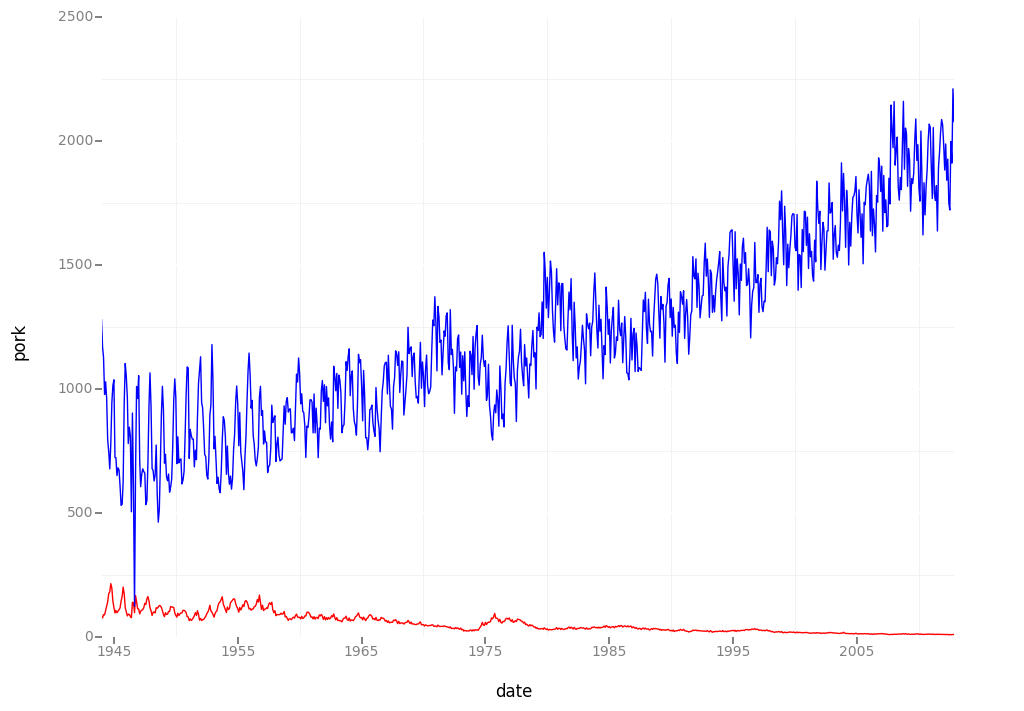

<ggplot: (8794907871833)>

In [7]:
g = gg.ggplot(meat, gg.aes()) 
g \
+ gg.geom_line(gg.aes(x="date", y="veal", color="red")) \
+ gg.geom_line(gg.aes(x="date", y="pork", color="blue")) \
+ gg.theme_bw()

To make plotting easier, we may want to transform the data so that the type of meat becomes an attribute.  Pandas has various built-in tools that make this sort of thing pretty easy.

Melt: one row with four columns (A, B, C, D) is mapped into four rows with two columns (var, value) where in first row, var is A and value is the value from column A, in the second row, var is B and value is column B, etc.

In [ ]:
meat2 = pd.melt(meat, id_vars=['date'], var_name='meat_type', value_name='quantity')
meat2.head()

In [ ]:
meat2.tail()

In [ ]:
g = gg.ggplot(meat2, gg.aes(x="date", y="quantity", color="meat_type")) 
g + gg.geom_line() \
+ gg.theme_bw() \
+ gg.scale_color_brewer(type="qual") 